# Chapter 5 Statistics

In [15]:
import sys
import NotebookLoader
sys.meta_path.append(NotebookLoader.NotebookFinder())
import Chapter4 as Ch4

importing Jupyter notebook from Chapter4.ipynb


In [16]:
# Chapter 5: Statistics

from __future__ import division
import matplotlib.pyplot as plt
from collections import Counter
import random as r
import math


# For reproducibility 
r.seed(1248)


if __name__ == "__main__":
    # Data set:
    num_friends = [r.randint(1,100) for i in range(200)]

    # Create a histogram for the data
    friends_counts = Counter(num_friends)
    xs = range(101)
    ys = [friends_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0, 101, 0, 25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")

    num_points = len(num_friends)

    largest_value = max(num_friends)
    smallest_value = min(num_friends)

    sorted_values = sorted(num_friends)
    second_smallest_value = sorted_values[1]
    print((smallest_value, second_smallest_value))
    print(mean(num_friends))

(1, 1)
49.76


### Central Tendencies

In [17]:
#### Central Tendencies ####

def mean(x):
    return sum(x)/len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 :
        return sorted_v[midpoint]
    else:
        # if the length is even, we need to average
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])/2
if __name__ == "__main__":
    print("Median: "  + str(median(num_friends)))

# Medians generalize well into quantiles:
def quantile(x,p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]


if __name__ == "__main__":
    print(quantile(num_friends, .10))
    print(quantile(num_friends, .25))
    print(quantile(num_friends, .75))
    print(quantile(num_friends, .90))

# The mode is less commonly used but is still useful
def mode(x):
    """Returns a list (might be more than one mode)"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems() if count == max_count]

Median: 47.0
11
26
74
88


### Dispersion

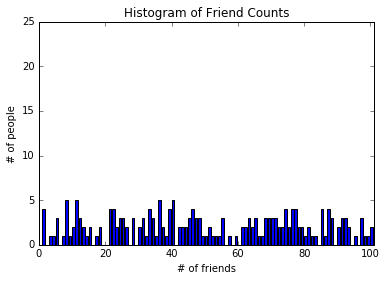

In [18]:
#### Dispersion ####

# Dispersion refers to a measure of how spread out the data is
#   - Examples include range, variance

def data_range(x):
    return max(x) - min(x)
    
# Fails in a similar way to median: does not consider all data points

# The variance is a measure of dispersion which incorporates all data points

def de_mean(x):
    """returns x - x_bar"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
    
def variance(x):
    """Assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return Ch4.sum_of_squares(deviations) / (n-1)
    
def standard_deviation(x):
    return math.sqrt(variance(x))

if __name__ == "__main__":
    plt.show()

In [19]:
#### Correlation ####

# Covariance measures how two variables vary in tandem from their means
def covariance(x, y):
    n = len(x)
    return Ch4.dot(de_mean(x), de_mean(y))/(n-1)

# Correlation is similar to covariance except that it is unitless and normalized (good)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / (stdev_x * stdev_y)
    else:
        return 0 # no variation, corr is 0 (saves divide by 0 error)

#### Simpson's Paradox 
    
Correlations can be misleading when confounding variables are ignored

Famous example is Simpson's Paradox
    
The lesson is to always try to know your data and to not blindly trust metrics
    
Also be aware that Correlation =/> Causation. If x and why are correlated then:
- x may cause y
- y may cause x
- some other factor z may cause x and y
- the correlation may mean nothing at all
